# Aşama 5: Boyut Azaltma

**Proje**: Çelik Levha Hata Tespiti  
**Amaç**: Bilgiyi koruyarak özellik boyutlarını azaltmak  
**Tarih**: Aralık 2024

---

## Genel Bakış

Boyut azaltma, yüksek boyutlu veriyi daha düşük boyutlu bir temsile dönüştürür.

**Kapsanan teknikler:**
1. **PCA**: Doğrusal dönüşüm, varyansı korur
2. **t-SNE**: Doğrusal olmayan, yerel yapıyı korur

---

## Neden Boyut Azaltmalı?

- 📊 **Görselleştirme**: Yüksek boyutlu veriyi 2D/3D'de çiz
- 🚀 **Hız**: Daha az özellikle daha hızlı eğitim
- 🎯 **Gürültü azaltma**: Daha az önemli boyutları kaldır
- 🔍 **Özellik çıkarma**: Yeni anlamlı özellikler oluştur

---

## İçindekiler

1. [Kurulum ve Veri Yükleme](#1-kurulum-ve-veri-yükleme)
2. [PCA - Temel Bileşen Analizi](#2-pca)
3. [t-SNE Görselleştirmesi](#3-t-sne)
4. [Karşılaştırma](#4-karşılaştırma)
5. [Özet](#5-özet)

---
## 1. Kurulum ve Veri Yükleme

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, LabelEncoder

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_style('whitegrid')

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


In [2]:
# Load and prepare data
df = pd.read_csv('../data/raw/steel_plates_fault.csv')

# Get features and target
feature_cols = [col for col in df.columns if col != 'Class']
X = df[feature_cols].values

# Encode target for coloring
le = LabelEncoder()
y = le.fit_transform(df['Class'])
class_names = le.classes_

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"✓ Data loaded: {X_scaled.shape[0]} samples, {X_scaled.shape[1]} features")
print(f"✓ Classes: {len(class_names)}")
for i, name in enumerate(class_names):
    print(f"   {i}: {name}")

✓ Data loaded: 1941 samples, 27 features
✓ Classes: 7
   0: Bumps
   1: Dirtiness
   2: K_Scratch
   3: Other_Faults
   4: Pastry
   5: Stains
   6: Z_Scratch


---
## 2. PCA - Temel Bileşen Analizi

### PCA Nasıl Çalışır:

1. **Veriyi ortala**: Her özellikten ortalamayı çıkar
2. **Kovaryans matrisini hesapla**: Özelliklerin birlikte nasıl değiştiğini ölç
3. **Özvektörleri bul**: Maksimum varyans yönleri
4. **Veriyi yansıt**: Temel bileşenlere dönüştür

**Temel kavramlar:**
- **Temel Bileşenler (PC'ler)**: Yeni ortogonal eksenler
- **Açıklanan Varyans**: Her PC'nin ne kadar bilgi yakaladığı
- **Yüklemeler**: Orijinal özelliklerin her PC'ye katkısı

In [3]:
# Apply PCA with all components first
pca_full = PCA()
pca_full.fit(X_scaled)

# Explained variance
explained_var = pca_full.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

print("📊 PCA Explained Variance:\n")
for i in range(min(10, len(explained_var))):
    print(f"   PC{i+1}: {explained_var[i]*100:.2f}% (Cumulative: {cumulative_var[i]*100:.2f}%)")

# Find components needed for 90% and 95% variance
n_90 = np.argmax(cumulative_var >= 0.90) + 1
n_95 = np.argmax(cumulative_var >= 0.95) + 1

print(f"\n📊 Components needed:")
print(f"   For 90% variance: {n_90} components")
print(f"   For 95% variance: {n_95} components")
print(f"   Original features: {X_scaled.shape[1]}")

📊 PCA Explained Variance:

   PC1: 30.75% (Cumulative: 30.75%)
   PC2: 12.67% (Cumulative: 43.42%)
   PC3: 10.01% (Cumulative: 53.43%)
   PC4: 8.29% (Cumulative: 61.72%)
   PC5: 7.30% (Cumulative: 69.02%)
   PC6: 6.01% (Cumulative: 75.04%)
   PC7: 5.10% (Cumulative: 80.14%)
   PC8: 3.70% (Cumulative: 83.84%)
   PC9: 3.41% (Cumulative: 87.26%)
   PC10: 2.89% (Cumulative: 90.15%)

📊 Components needed:
   For 90% variance: 10 components
   For 95% variance: 13 components
   Original features: 27


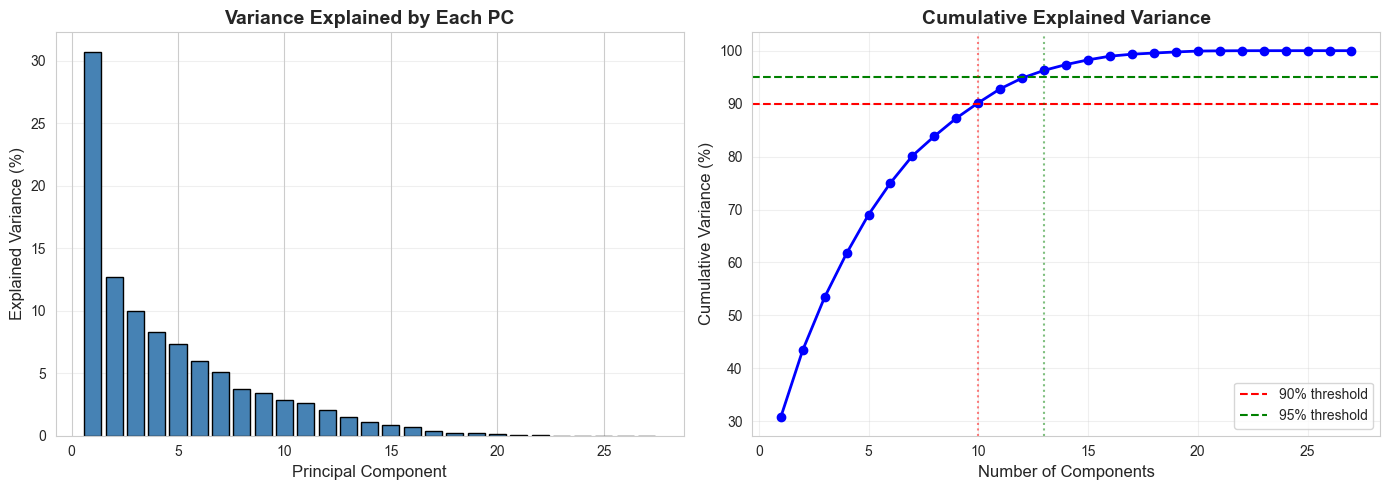

In [4]:
# Visualize explained variance
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Individual variance
axes[0].bar(range(1, len(explained_var)+1), explained_var*100, color='steelblue', edgecolor='black')
axes[0].set_xlabel('Principal Component', fontsize=12)
axes[0].set_ylabel('Explained Variance (%)', fontsize=12)
axes[0].set_title('Variance Explained by Each PC', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Cumulative variance
axes[1].plot(range(1, len(cumulative_var)+1), cumulative_var*100, 'bo-', linewidth=2, markersize=6)
axes[1].axhline(y=90, color='r', linestyle='--', label='90% threshold')
axes[1].axhline(y=95, color='g', linestyle='--', label='95% threshold')
axes[1].axvline(x=n_90, color='r', linestyle=':', alpha=0.5)
axes[1].axvline(x=n_95, color='g', linestyle=':', alpha=0.5)
axes[1].set_xlabel('Number of Components', fontsize=12)
axes[1].set_ylabel('Cumulative Variance (%)', fontsize=12)
axes[1].set_title('Cumulative Explained Variance', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

✓ PCA 2D projection completed
   PC1 variance: 30.75%
   PC2 variance: 12.67%
   Total: 43.42%


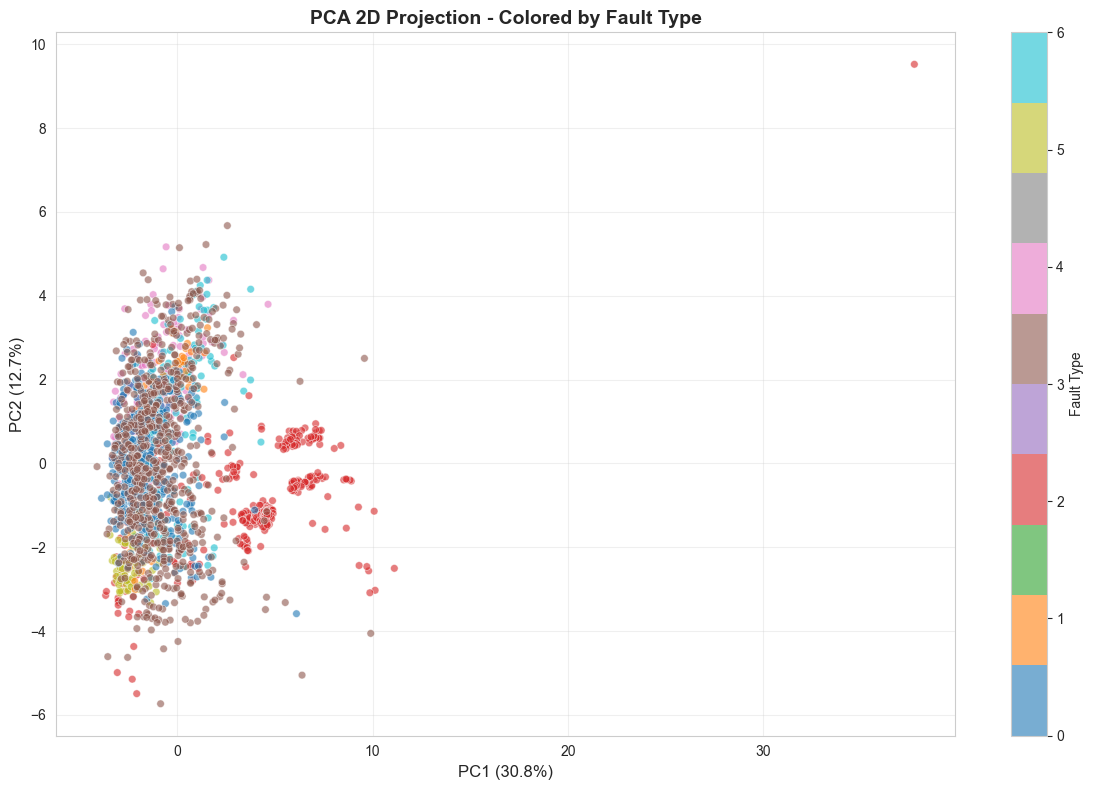


💡 Points with same color should cluster together if classes are separable


In [5]:
# PCA 2D projection
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

print(f"✓ PCA 2D projection completed")
print(f"   PC1 variance: {pca_2d.explained_variance_ratio_[0]*100:.2f}%")
print(f"   PC2 variance: {pca_2d.explained_variance_ratio_[1]*100:.2f}%")
print(f"   Total: {sum(pca_2d.explained_variance_ratio_)*100:.2f}%")

# Visualize
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='tab10', 
                      alpha=0.6, s=30, edgecolors='white', linewidth=0.5)
plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}%)', fontsize=12)
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}%)', fontsize=12)
plt.title('PCA 2D Projection - Colored by Fault Type', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Fault Type')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 Points with same color should cluster together if classes are separable")

In [6]:
# Feature loadings (importance of original features to PCs)
print("📊 Top Feature Contributions to PC1 and PC2:\n")

loadings = pd.DataFrame(
    pca_2d.components_.T,
    columns=['PC1', 'PC2'],
    index=feature_cols
)

# Top contributors to PC1
print("PC1 - Top 5 features:")
pc1_top = loadings['PC1'].abs().sort_values(ascending=False).head(5)
for feat, val in pc1_top.items():
    sign = '+' if loadings.loc[feat, 'PC1'] > 0 else '-'
    print(f"   {sign} {feat}: {loadings.loc[feat, 'PC1']:.4f}")

print("\nPC2 - Top 5 features:")
pc2_top = loadings['PC2'].abs().sort_values(ascending=False).head(5)
for feat, val in pc2_top.items():
    sign = '+' if loadings.loc[feat, 'PC2'] > 0 else '-'
    print(f"   {sign} {feat}: {loadings.loc[feat, 'PC2']:.4f}")

📊 Top Feature Contributions to PC1 and PC2:

PC1 - Top 5 features:
   + LogOfAreas: 0.3197
   + Log_X_Index: 0.3081
   + Sum_of_Luminosity: 0.2974
   + Pixels_Areas: 0.2849
   + Log_Y_Index: 0.2726

PC2 - Top 5 features:
   + Orientation_Index: 0.4570
   + Outside_Global_Index: 0.4059
   - Edges_X_Index: -0.3428
   - Luminosity_Index: -0.3081
   - Maximum_of_Luminosity: -0.2795


---
## 3. t-SNE Görselleştirmesi

### t-SNE Nasıl Çalışır:

**t-Dağılımlı Stokastik Komşu Gömme**

1. Yüksek boyutlu uzayda ikili benzerlikleri hesapla
2. Düşük boyutlu uzayda noktaları rastgele başlat
3. Benzerlikleri eşleştirmek için konumları yinelemeli olarak ayarla
4. Uzak noktaların yayılmasına izin vermek için t-dağılımı kullanır

**Anahtar parametre - Perplexity:**
- Yerel ve global yapı arasındaki dikkati dengeler
- Tipik aralık: 5-50
- Daha yüksek = daha fazla komşu düşün

**Not:** t-SNE yalnızca görselleştirme içindir, özellik çıkarma için değil!

🔍 Applying t-SNE (this may take a moment)...

   Computing t-SNE with perplexity=5...
   Computing t-SNE with perplexity=30...
   Computing t-SNE with perplexity=50...


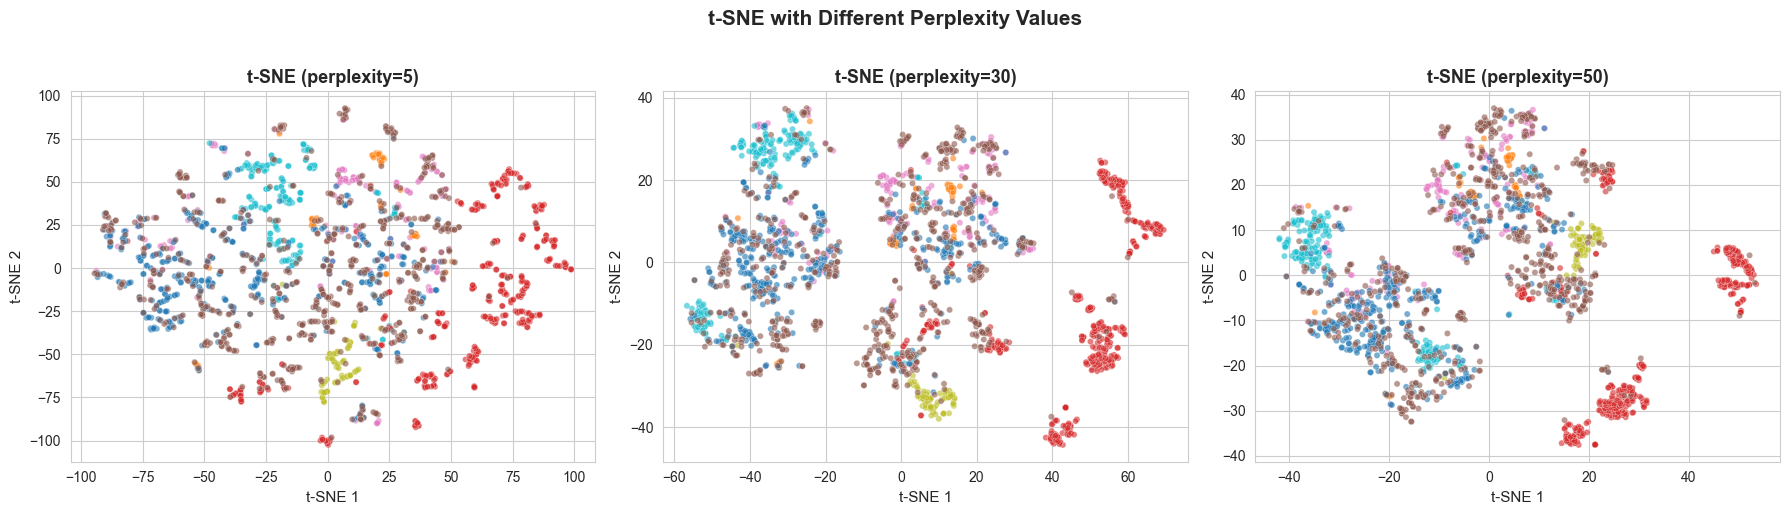


✓ t-SNE completed for all perplexity values

💡 Higher perplexity = more global structure preserved


In [7]:
# Apply t-SNE with different perplexity values
print("🔍 Applying t-SNE (this may take a moment)...\n")

perplexities = [5, 30, 50]
tsne_results = {}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, perp in enumerate(perplexities):
    print(f"   Computing t-SNE with perplexity={perp}...")
    
    tsne = TSNE(n_components=2, perplexity=perp, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)
    tsne_results[perp] = X_tsne
    
    # Plot
    scatter = axes[idx].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', 
                                alpha=0.6, s=20, edgecolors='white', linewidth=0.3)
    axes[idx].set_xlabel('t-SNE 1', fontsize=11)
    axes[idx].set_ylabel('t-SNE 2', fontsize=11)
    axes[idx].set_title(f't-SNE (perplexity={perp})', fontsize=13, fontweight='bold')

plt.suptitle('t-SNE with Different Perplexity Values', fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n✓ t-SNE completed for all perplexity values")
print("\n💡 Higher perplexity = more global structure preserved")

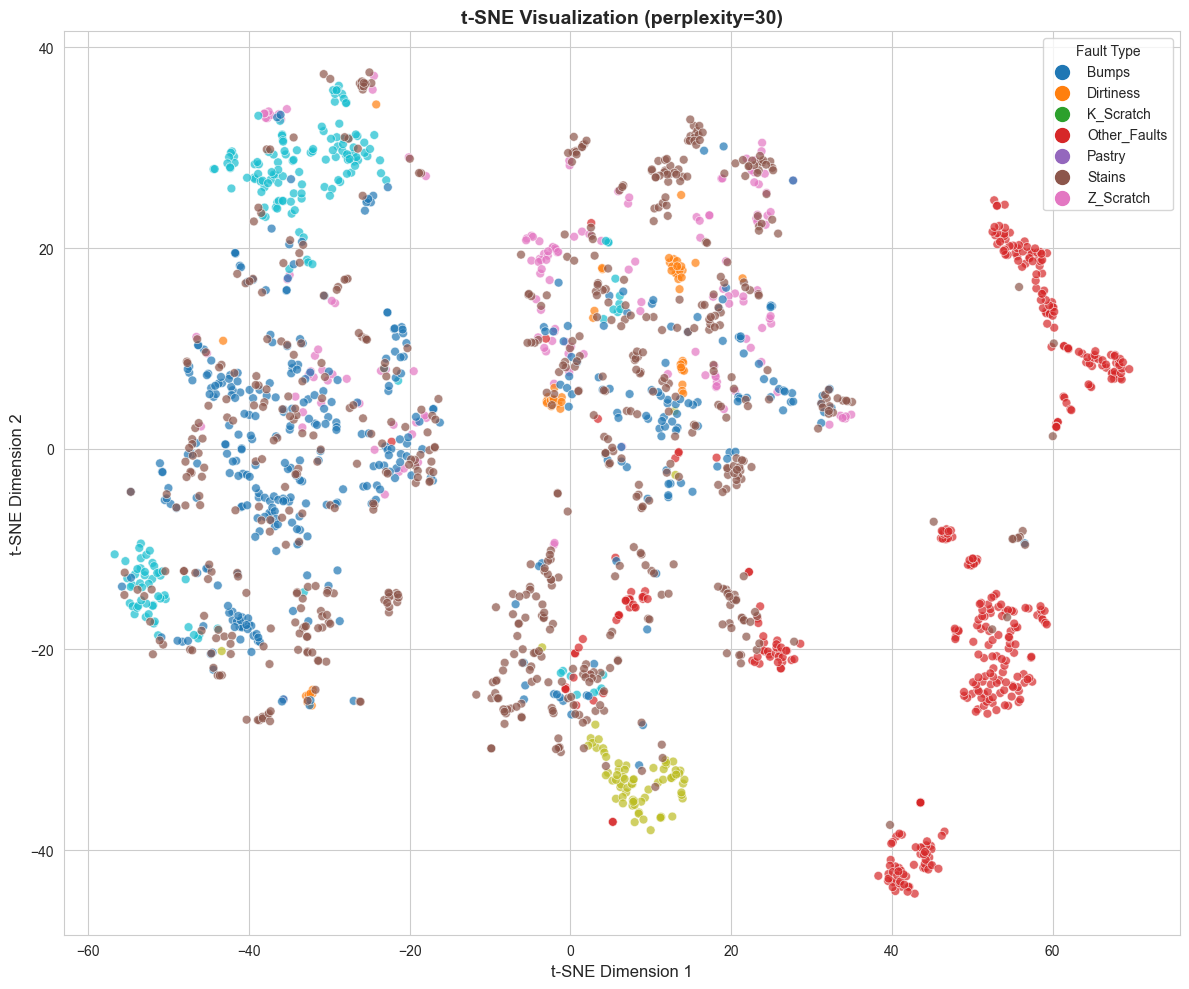

💡 Clusters visible in t-SNE suggest the fault types are distinguishable


In [8]:
# Best t-SNE visualization (perplexity=30 is often a good default)
X_tsne = tsne_results[30]

plt.figure(figsize=(12, 10))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', 
                      alpha=0.7, s=40, edgecolors='white', linewidth=0.5)
plt.xlabel('t-SNE Dimension 1', fontsize=12)
plt.ylabel('t-SNE Dimension 2', fontsize=12)
plt.title('t-SNE Visualization (perplexity=30)', fontsize=14, fontweight='bold')

# Add legend
handles = [plt.scatter([], [], c=plt.cm.tab10(i/10), s=100, label=name) 
           for i, name in enumerate(class_names)]
plt.legend(handles=handles, title='Fault Type', loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

print("💡 Clusters visible in t-SNE suggest the fault types are distinguishable")

---
## 4. Karşılaştırma

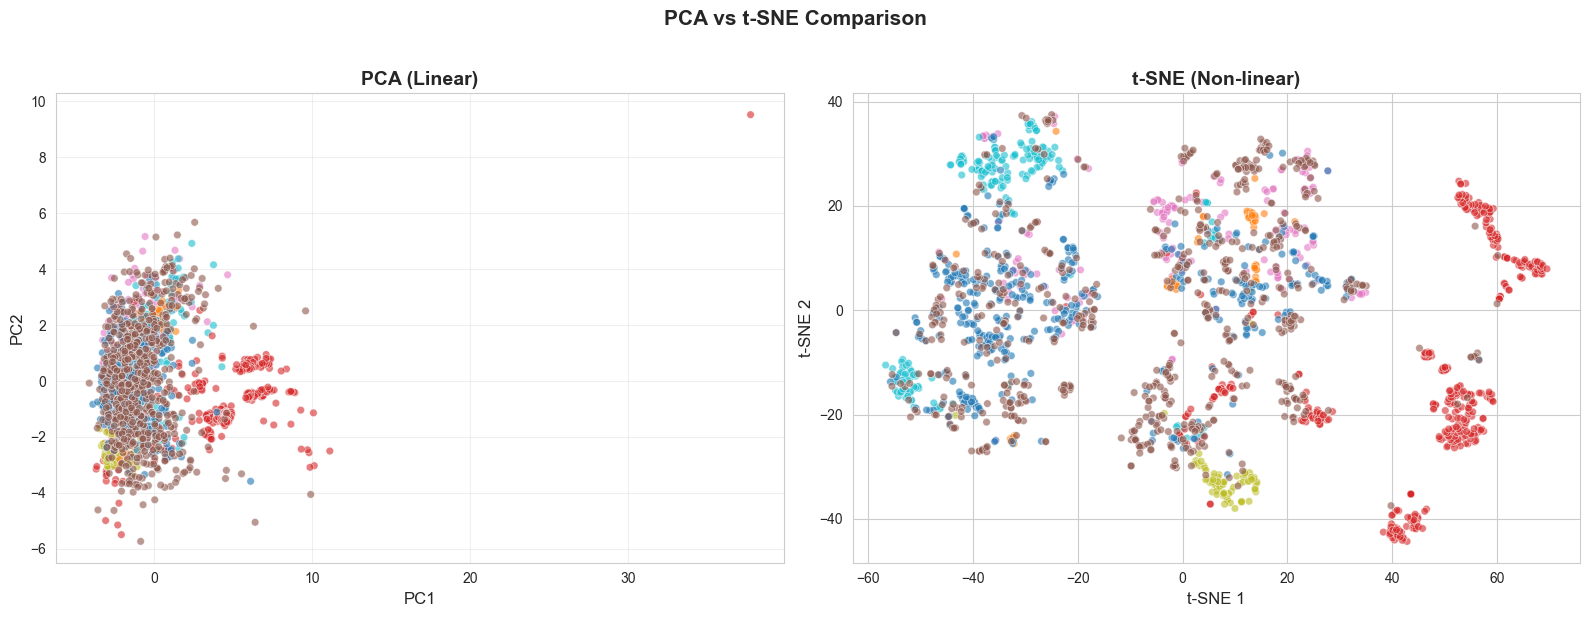

📊 Comparison:
   PCA: Preserves global structure, fast, can be inverted
   t-SNE: Better cluster separation, slow, visualization only


In [9]:
# Compare PCA vs t-SNE
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# PCA
scatter1 = axes[0].scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='tab10', 
                           alpha=0.6, s=30, edgecolors='white', linewidth=0.5)
axes[0].set_xlabel('PC1', fontsize=12)
axes[0].set_ylabel('PC2', fontsize=12)
axes[0].set_title('PCA (Linear)', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# t-SNE
scatter2 = axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', 
                           alpha=0.6, s=30, edgecolors='white', linewidth=0.5)
axes[1].set_xlabel('t-SNE 1', fontsize=12)
axes[1].set_ylabel('t-SNE 2', fontsize=12)
axes[1].set_title('t-SNE (Non-linear)', fontsize=14, fontweight='bold')

plt.suptitle('PCA vs t-SNE Comparison', fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("📊 Comparison:")
print("   PCA: Preserves global structure, fast, can be inverted")
print("   t-SNE: Better cluster separation, slow, visualization only")

---
## 5. Özet

### 📊 Boyut Azaltma Özeti

| Yöntem | Tür | En İyi Kullanım | Korur |
|--------|-----|-----------------|-------|
| **PCA** | Doğrusal | Özellik azaltma, hız | Global varyans |
| **t-SNE** | Doğrusal olmayan | Görselleştirme | Yerel yapı |

### 🎯 Temel Bulgular

1. **PCA**: İlk 10 bileşen varyansın ~%90'ını yakalar
2. **t-SNE**: Daha net küme ayrımı gösterir
3. **Hata türleri** biraz örtüşür ama ayırt edilebilir

### 💡 Ne Zaman Kullanmalı

- **PCA**: Ön işleme, özellik azaltma, hız önemliyse
- **t-SNE**: Görselleştirme, veri yapısını anlama

---

✅ **Aşama 5 (Boyut Azaltma) Tamamlandı!**